<img src="movie_recommendation/movie.jpg">

# Movie Recommendation System
## This project will build a model where users get the recommendations of the movies based on their searched list of movie.

> For this project I will be using K-Nearest Neighbors algorithm which is one of the useful machine learning algorithm to train our model.

* Recommendation System
>Recommendation systems are becoming increasingly important in today’s extremely busy world. People are always short on time with the myriad tasks they need to accomplish in the limited 24 hours. Therefore, the recommendation systems are important as they help them make the right choices, without having to expend their cognitive resources.
The purpose of a recommendation system basically is to search for content that would be interesting to an individual. Moreover, it involves a number of factors to create personalised lists of useful and interesting content specific to each user/individual. Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual. These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies. This is achieved through predictive modeling and heuristics with the data available.

# KNN
>Well KNN can be used both for the regression and classification problems in Machine Learning, it is basically used for classification purpose where we select the k-neighbors, which is the number of neighbors we choose to predict the result. For that we will use various distance measurements like Manhattan Distance, Euclidean Distance and other distance metrics, and the new points which has the highest votes of concluding that the particular point belong to that neighbors will be asscociated to that particular Neighbors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Tools that we will be using in this project
* Numpy - for numerical operations
* Pandas - for data analysis
* Matplotlib - for data visualization
* Seaborn - same use as Matplotlib with additional features
* Scikit-Learn(Sklearn) - for machine learning modelling

In [4]:
# Reading the dataset from https://grouplens.org/datasets/movielens/latest/ dataset
movies = pd.read_csv('movie_recommendation/movies.csv',usecols=['movieId','title'],dtype={'movieId':'int32',
                                                                                          'title':'str'
                                                                                         })


## I am only using movieId and title as a columns and changing the movieId to integer as it acts as a primary key and title is considered as string

In [30]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
movies.tail()

,movieId,title
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)
9741,193609,Andrew Dice Clay: Dice Rules (1991)


In [7]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


# Now lets read our ratings dataset from which we will be modelling our data. That is, the recommendation sysytem is based on this rating

In [8]:
ratings = pd.read_csv('movie_recommendation/ratings.csv',usecols=['userId','movieId','rating'],dtype={'userId':'int32',
                                                                                                      'movieId':'int32',
                                                                                                      'rating':'float32'
                                                                                                     })

In [31]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [32]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


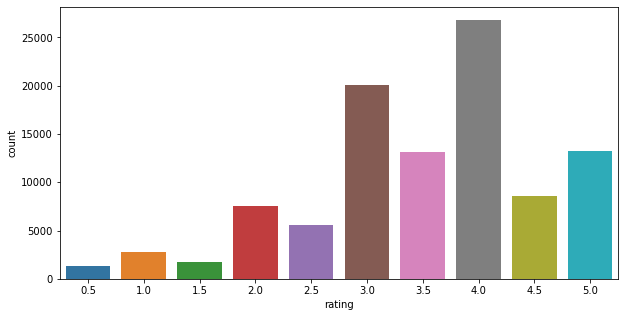

In [42]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.countplot(x="rating",data=ratings);

In [62]:
fig.savefig('movie_recommendation/countplot.png')

## Here we can observe clearly that majority of the people rated as 4.0 and less number of people voted 0.5 with 3.0 being an average

>Let's concat movie and ratings so that I can make a single dataframe from the first 20 samples both in movie and ratings.

In [12]:
movie_sample = movies['title'].iloc[:20]
rating_sample = ratings['rating'].iloc[:20]
concat_sample = pd.DataFrame(data={"sample_movie":movie_sample,
                                   "rating_movie":rating_sample},
                             )




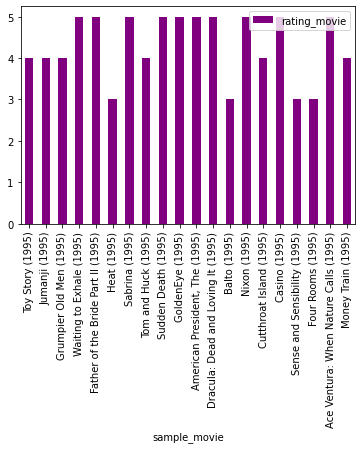

In [45]:
concat_sample.plot(x="sample_movie",y="rating_movie",kind="bar",color="purple");

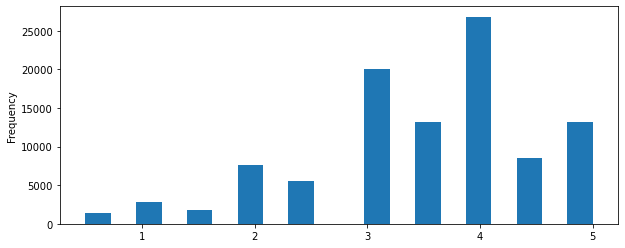

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].plot.hist(bins=20);

In [63]:
fig.savefig('movie_recommendation/ratinghist.png')

>Using sparse matrix
# What is sparse matrix?
* Matrix that contain mostly zero values are called sparse matrix where most of the values are non-zero,called dense.
* Many matrix problems that occur in practice are sparse

In [47]:
from scipy.sparse import csc_matrix

In [49]:
movies_users = ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)

In [50]:
movies_users

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
mat_movies_users = csc_matrix(movies_users)

In [52]:
print(mat_movies_users)

  (0, 0)	4.0
  (2, 0)	4.0
  (5, 0)	4.0
  (43, 0)	5.0
  (46, 0)	5.0
  (62, 0)	3.0
  (89, 0)	5.0
  (97, 0)	4.0
  (124, 0)	5.0
  (130, 0)	5.0
  (136, 0)	5.0
  (184, 0)	5.0
  (190, 0)	3.0
  (197, 0)	5.0
  (201, 0)	4.0
  (224, 0)	5.0
  (257, 0)	3.0
  (275, 0)	3.0
  (291, 0)	5.0
  (307, 0)	4.0
  (314, 0)	4.0
  (320, 0)	5.0
  (325, 0)	4.0
  (367, 0)	3.0
  (384, 0)	4.0
  :	:
  (9238, 609)	5.0
  (9246, 609)	4.5
  (9256, 609)	4.0
  (9268, 609)	5.0
  (9274, 609)	3.5
  (9279, 609)	3.5
  (9282, 609)	3.0
  (9288, 609)	3.0
  (9304, 609)	3.0
  (9307, 609)	2.5
  (9312, 609)	4.5
  (9317, 609)	3.0
  (9324, 609)	3.0
  (9339, 609)	4.0
  (9341, 609)	4.0
  (9348, 609)	3.5
  (9371, 609)	3.5
  (9372, 609)	3.5
  (9374, 609)	5.0
  (9415, 609)	4.0
  (9416, 609)	4.0
  (9443, 609)	5.0
  (9444, 609)	5.0
  (9445, 609)	5.0
  (9485, 609)	3.0


# Python's fuzzywuzzy library can be very useful too to have for measuring the similarity between two strings.

In [54]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

In [55]:
knn_model = NearestNeighbors()

In [56]:
knn_model.fit(mat_movies_users)

NearestNeighbors()

In [57]:
# def recomender(movie_name,data,model,n_recommendation):
def recomender(movie_name,data,model,n_recommendation):
#     index = process.extractOne(movie_name,movies['title'])[2]
#     print('Movie Selected:',movies['title'][index],'Index:',index)
#     print('Searching for recommendations....')
#     distances, indices = model.kneighbors(data[index],n_neighbors = n_recommendation)
#     for i in indices:
#         print(movies['title'][i].where(i!=index))
    index = process.extractOne(movie_name,movies['title'])[2]
    print('Movie Selected:',movies['title'][index],'Index:',index)
    print('Searching For Recommendations....')
    distances, indices = model.kneighbors(data[index],n_neighbors=n_recommendation)
    for i in indices:
        print(movies['title'][i].where(i!=index))
        
    
recomender('avengers',mat_movies_users,knn_model,10)
    

Movie Selected: Avengers, The (1998) Index: 1611
Searching For Recommendations....
1611                                                  NaN
3819                                    Spider-Man (2002)
5386                     Christmas with the Kranks (2004)
5564        Riki-Oh: The Story of Ricky (Lik Wong) (1991)
5205    Human Condition I, The (Ningen no joken I) (1959)
3546                          Spriggan (Supurigan) (1998)
2858                            Autumn in New York (2000)
3941                                    Swarm, The (1978)
6803                                   Man on Wire (2008)
4283                             View from the Top (2003)
Name: title, dtype: object


# Checking the sparse matrix and fuzzyuzzy

In [58]:

# dense to sparse

from scipy.sparse import csr_matrix
# create dense matrix
A = np.array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)
# reconstruct dense matrix
B = S.todense()
print(B)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [59]:
from fuzzywuzzy import fuzz
similarity = fuzz.ratio("hello","world")

In [60]:
similarity

20

In [61]:
fuzz.ratio("The Lord of the Rings II: The Two Towers",
           "The Lord of the Rings 2: the 2 Towers") 

88

In [28]:
#88% for two different countries
fuzz.ratio("Austria","Australia")

88